# Курс от Тинькофф "Анализ данных в индустрии"

## Домашнее задание. АБ-тесты. Часть 3.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

from statsmodels.stats import weightstats as stests
import matplotlib.pyplot as plt

# Для красивых графиков
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.4)

### Задание 1

В файле **test_1.csv** лежит результат теста. (target - какая-то целевая метрика)

Изучите результаты теста и сделайте вывод (проверяем гипотезу о равенстве средних). В качестве решения - ноутбук, в котором построено распределение параметра target в группах и проверены нужные критерии.

In [2]:
# Загрузим данные
data1 = pd.read_csv('test_1.csv')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 3 columns):
group        1998 non-null object
client_id    1998 non-null int64
target       1998 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 47.0+ KB


In [3]:
# Посмотрим, как они выглядят
data1.sample(10)

,group,client_id,target
243,test,244,50.288187
468,test,469,52.422348
1858,control,1859,51.197074
350,test,351,49.151507
241,test,242,51.918330
381,test,382,49.440251
1877,control,1878,52.467123
209,test,210,41.987265
1472,control,1473,53.588474
111,test,112,45.834090


In [4]:
# Выделим таргет для тестовой группы
test_target = data1[data1.group == 'test'].target.to_numpy()
test_target.shape

(1010,)

In [5]:
# Выделим таргет для контрольной группы
control_target = data1[data1.group == 'control'].target.to_numpy()
control_target.shape

(988,)

In [6]:
# Проверим, зависимые выборки или нет
data1.client_id.unique().shape

(1998,)

Получается, что для каждой строки данных id клиента уникален, значит в тестовой и контрольной выборке клиенты разные, выборки независимы

Построим графики распределения

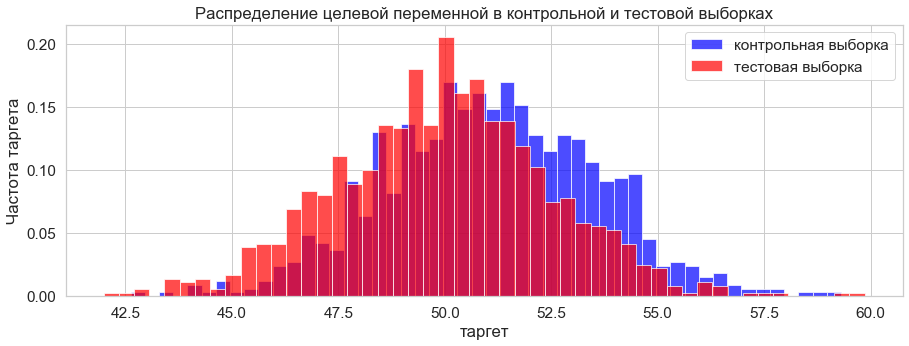

In [7]:
plt.figure(figsize=(15,5))
plt.hist(control_target, bins=50, density=True, color='blue', alpha=0.7, label ='контрольная выборка')
plt.hist(test_target, bins=50, density=True, color='red', alpha=0.7, label ='тестовая выборка')
plt.legend()
plt.title('Распределение целевой переменной в контрольной и тестовой выборках')
plt.xlabel('таргет')
plt.ylabel('Частота таргета')
plt.show()

По графикам видно, что распределения довольно близки к нормальному, но тестовая выборка имеет смещение вправо, в сторону более низких значений таргета. 

Построим $QQ-plot$

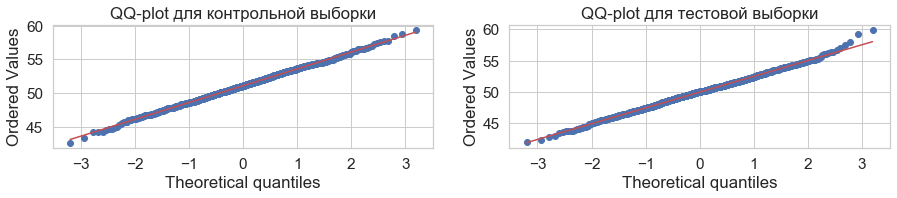

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
stats.probplot(control_target, dist="norm", plot=plt)
plt.title('QQ-plot для контрольной выборки')
plt.subplot(2,2,2)
stats.probplot(test_target, dist="norm", plot=plt)
plt.title('QQ-plot для тестовой выборки')
plt.show()

Очевидно, что выборки взяты из нормального распределения

$H_0: \mu_1 = \mu_0$\
$H_1: \mu_1 \neq \mu_0$ (Будем проверять двухстороннюю гипотезу).\
Рассчитаем $Z$-критерий для двух независимых выборок

$$ Z (X_n) = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}}$$


In [23]:
# Поскольку выборки имеют разные дисперсии и размер, нельзя использовать функцию ztest из модуля stests.
# Рассчитаем статистику вручную по формуле.
diff_mean = control_target.mean() - test_target.mean()
disp_sqrt = np.sqrt((control_target.var(ddof=1) / control_target.shape[0]) + 
                    (test_target.var(ddof=1) / test_target.shape[0]))

z_stat = diff_mean / disp_sqrt

print('Z-статистика = ', round(z_stat, 5))

Z-статистика =  9.87942


Посчитаем p-value

In [27]:
p_val = 2*(1-stats.norm.cdf(abs(z_stat)))
print('p-value two-sided:', p_val)

p-value two-sided: 0.0


Можно с уверенностью отвергнуть гипотезу о равенстве средних (на уровне значимости менее 0.01). Среднее в тестовой выборке отличается от среднего в контрольной.

### Задание 2

В файле **test_2.csv** лежит результат теста, который был нацелен на увеличение суммы чека клиента. 

Изучите результаты теста и сделайте вывод, увеличилась сумма чека или нет. В качестве решения - ноутбук, в котором построено распределение параметра в группах и проверены нужные критерии.

In [28]:
# Загрузим данные
data2 = pd.read_csv('test_2.csv')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
group        600 non-null object
client_id    600 non-null int64
avg_sum      600 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.2+ KB


In [29]:
# Посмотрим, как они выглядят
data2.sample(10)

,group,client_id,avg_sum
508,control,509,87.557346
223,test,224,88.980279
164,test,165,88.537719
348,control,349,182.073534
390,control,391,84.099133
7,test,8,160.388500
383,control,384,263.307127
446,control,447,15.395380
165,test,166,754.816458
427,control,428,71.838640


In [30]:
# Выделим таргет для тестовой группы
test_sum = data2[data2.group == 'test'].avg_sum.to_numpy()
test_sum.shape

(306,)

In [31]:
# Выделим таргет для контрольной группы
control_sum = data2[data2.group == 'control'].avg_sum.to_numpy()
control_sum.shape

(294,)

In [33]:
# Проверим, зависимые выборки или нет
data2.client_id.unique().shape

(600,)

Получается, что для каждой строки данных id клиента уникален, значит в тестовой и контрольной выборке клиенты разные, выборки независимы

Построим графики распределения

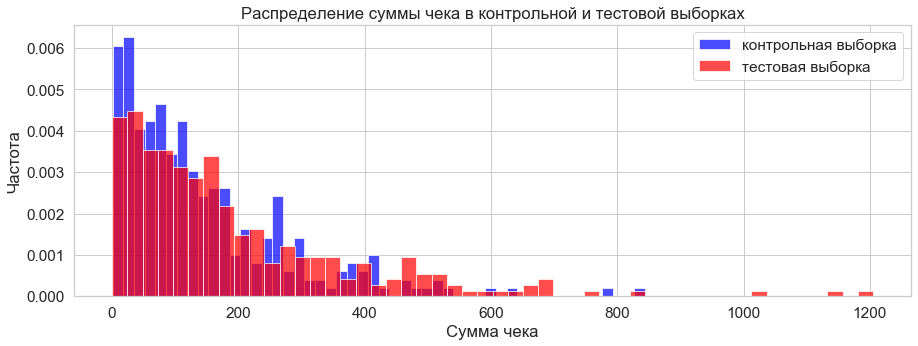

In [34]:
plt.figure(figsize=(15,5))
plt.hist(control_sum, bins=50, density=True, color='blue', alpha=0.7, label ='контрольная выборка')
plt.hist(test_sum, bins=50, density=True, color='red', alpha=0.7, label ='тестовая выборка')
plt.legend()
plt.title('Распределение суммы чека в контрольной и тестовой выборках')
plt.xlabel('Сумма чека')
plt.ylabel('Частота')
plt.show()

Оба распределения похожи на экспоненциальные. Это стоит проверить.

Выполним тест Колмогорова-Смирнова. Сравним тестовое и контрольное распределение с нормальным и экспоненциальным

$H_0$: Случайная величина выборки взята из генеральной совокупности с распределением F
    
$H_1$: Случайная величина выборки взята из генеральной совокупности с другим распределением

In [38]:
# Нормальное распределение для контрольной выборки
stats.kstest(control_sum, 'norm')

KstestResult(statistic=0.9960423069313241, pvalue=0.0)

In [39]:
# Нормальное распределение для тестовой выборки
stats.kstest(test_sum, 'norm')

KstestResult(statistic=0.9916670995681639, pvalue=0.0)

Построим $QQ-plot$

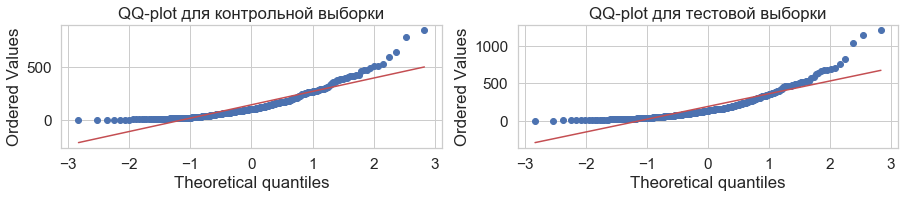

In [46]:
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
stats.probplot(control_sum, dist="norm", plot=plt)
plt.title('QQ-plot для контрольной выборки')
plt.subplot(2,2,2)
stats.probplot(test_sum, dist="norm", plot=plt)
plt.title('QQ-plot для тестовой выборки')
plt.show()

Отвергаем гипотезу о нормальном распределении выборок. И Тест Колмогорова-Смирнова и $QQ-plot$ и визуализация гистограммы распределения очевидно свидетельствуют о том, что распределения не нормальные. Значит нельзя использовать тесты, чувствительные к нормальности

Будем использовать ранговый критерий **Манна-Уитни**

Нулевая гипотеза: $H_0$ : $F_{X1} (x) = F_{X2} (x)$ ;\
Альтернатива: $H_1$ : $F_{X1} (x) = F_{X2} (x + \Delta)$ ; $\Delta > 0$;\
В задаче прямо указывается, что надо проверять альтернативу увеличения суммы чека

In [62]:
stats.mannwhitneyu(test_sum, control_sum, alternative ='greater')

MannwhitneyuResult(statistic=50943.0, pvalue=0.0024922812779452318)

На уровне значимости $\alpha = 0.01$ можно отвергуть нулевую гипотезу, что выборки относятся к одному распределению. Можно полагать, что мероприятия по увеличению суммы чека оказались успешными

### Задание 3

В файле **test_3.csv** лежит результат теста рассылки email, целевая метрика - конверсия в переход на сайт с этого email. 

Изучите результаты теста и сделайте вывод , увеличилась конверсия или нет. В качестве решения - ноутбук, в котором построено распределение параметра в группах и проверены нужные критерии.

In [63]:
# Загрузим данные
data3 = pd.read_csv('test_3.csv')
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20033 entries, 0 to 20032
Data columns (total 3 columns):
group        20033 non-null object
client_id    20033 non-null int64
click_flg    20033 non-null int64
dtypes: int64(2), object(1)
memory usage: 469.6+ KB


In [64]:
# Посмотрим, как они выглядят
data3.sample(10)

,group,client_id,click_flg
9225,test,9226,1
12572,control,12573,0
1302,test,1303,0
15106,control,15107,0
15897,control,15898,1
4754,test,4755,0
10474,control,10475,0
11814,control,11815,1
8051,test,8052,0
1620,test,1621,1


В этом задание биномиальное распределение

In [65]:
# Проверим, зависимые выборки или нет
data3.client_id.unique().shape

(20033,)

Выборки независимы, потому что количество уникальных id соответствует количеству записей.

In [66]:
# Выделим таргет для тестовой группы
test_click = data3[data3.group == 'test'].click_flg.to_numpy()
test_click.shape

(10023,)

In [68]:
# Выделим таргет для контрольной группы
control_click = data3[data3.group == 'control'].click_flg.to_numpy()
control_click.shape

(10010,)

Построим графики распределения

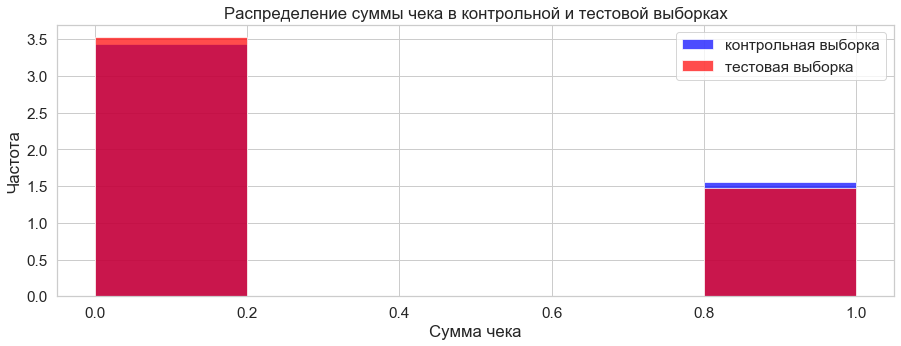

In [71]:
plt.figure(figsize=(15,5))
plt.hist(control_click, bins=5, density=True, color='blue', alpha=0.7, label ='контрольная выборка')
plt.hist(test_click, bins=5, density=True, color='red', alpha=0.7, label ='тестовая выборка')
plt.legend()
plt.title('Распределение суммы чека в контрольной и тестовой выборках')
plt.xlabel('Сумма чека')
plt.ylabel('Частота')
plt.show()

Распределения очень похожи.

Нам подходит Z-критерий для 2-х долей. Будем проверять одностороннюю гипотезу (увеличилась конверсия или нет). В тексте задачи явно не сказано, были ли проведены мероприятия по увеличению конверсии

нулевая гипотеза: $H_0$ : $p_1 = p_2$;\
альтернатива: $H_1$ : $p_1 \neq p_2$;

 Исход | $X_1$ | $X_2$  
 ------------- | ------------- | -------------|
  1  | a  | b 
  0  | c  | d 
  $\sum$  | $n_1$ | $n_2$ 
  
$$ \hat{p}_1 = \frac{a}{n_1}$$

$$ \hat{p}_2 = \frac{b}{n_2}$$

$$P = \frac{\hat{p}_1{n_1} + \hat{p}_2{n_2}}{{n_1} + {n_2}} $$  

$$Z-статистика: Z({X_1, X_2}) =  \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{P(1 - P)(\frac{1}{n_1} + \frac{1}{n_2})}}$$


In [76]:
# Аккуратно посчитаем Z-статистику
n1 = control_click.shape[0]
n2 = test_click.shape[0]
p1 = np.sum(control_click) / n1
p2 = np.sum(test_click) / n2
P = (np.sum(control_click) + np.sum(test_click)) / (n1 + n2)
Z_stat = (p1 - p2)/np.sqrt(P*(1-P)*(1 / n1 + 1 / n2))
Z_stat

2.595183244634136

In [80]:
p_value = 1 - stats.norm.cdf(Z_stat)
print('p_value two-sided', p_value)

p_value two-sided 0.0047270250062207975


На уровне значимости $\alpha = 0.01$ можно отклонить нулевую гипотезу. Значит конверсия увеличилась